# Delivery App Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading 

In [103]:
df = pd.read_csv("D:/Food_Delivery_Dataset.csv")
df.head()

,Order_ID,Customer_ID,City,Restaurant_ID,Restaurant_Name,Cuisine,Order_Value,Delivery_Time(mins),Customer_Rating,Delivery_Partner_ID,Delivery_Partner_Rating,Commission_Earned(%),Distance_km,App_Session_Duration(sec),Used_Promo,Campaign_ID,Payment_Mode,Delivery_Status,New_User,Order_DateTime
0,OID100000,CID7607,Hyderabad,RID87,Restaurant_125,Street Food,169.74,20,2.7,DID1558,NaN,23.5,2.83,223.0,Yes,CAM14,Cash,Late,No,2023-01-01 0:00:00
1,OID100001,CID4633,Kolkata,RID79,Restaurant_49,Italian,118.00,14,2.9,DID4058,3.9,22.5,1.82,188.0,Yes,CAM12,Net Banking,Late,No,2023-01-01 1:00:00
2,OID100002,CID4001,Delhi,RID155,Restaurant_37,Biryani,506.91,48,2.9,DID2601,3.1,17.0,4.44,147.0,Yes,CAM2,Net Banking,Late,No,2023-01-01 2:00:00
3,OID100003,CID2125,Hyderabad,RID179,Restaurant_16,Continental,117.53,39,4.4,DID4263,4.8,19.5,6.87,193.0,No,CAM4,Net Banking,On Time,Yes,2023-01-01 3:00:00
4,OID100004,CID8672,Delhi,RID192,Restaurant_159,South Indian,344.15,41,2.3,DID4266,4.1,19.9,5.53,252.0,Yes,CAM19,Net Banking,On Time,No,2023-01-01 4:00:00


### Data Overview

In [106]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order_ID                   10000 non-null  object 
 1   Customer_ID                10000 non-null  object 
 2   City                       10000 non-null  object 
 3   Restaurant_ID              10000 non-null  object 
 4   Restaurant_Name            10000 non-null  object 
 5   Cuisine                    10000 non-null  object 
 6   Order_Value                10000 non-null  float64
 7   Delivery_Time(mins)        10000 non-null  int64  
 8   Customer_Rating            9500 non-null   float64
 9   Delivery_Partner_ID        10000 non-null  object 
 10  Delivery_Partner_Rating    9500 non-null   float64
 11  Commission_Earned(%)       10000 non-null  float64
 12  Distance_km                10000 non-null  float64
 13  App_Session_Duration(sec)  9500 non-null   floa

,Order_Value,Delivery_Time(mins),Customer_Rating,Delivery_Partner_Rating,Commission_Earned(%),Distance_km,App_Session_Duration(sec)
count,10000.000000,10000.000000,9500.000000,9500.000000,10000.000000,10000.000000,9500.000000
mean,404.300296,32.364400,3.495737,3.742495,16.559460,4.510695,201.418526
std,187.010650,12.653261,0.865434,0.727203,4.886736,1.970272,80.653268
min,50.000000,5.000000,2.000000,2.500000,8.000000,0.500000,-133.000000
25%,297.875000,24.000000,2.700000,3.100000,12.400000,3.150000,146.000000
50%,398.425000,32.000000,3.500000,3.700000,16.600000,4.500000,202.000000
75%,500.180000,40.000000,4.200000,4.400000,20.800000,5.860000,256.000000
max,3937.700000,162.000000,5.000000,5.000000,25.000000,11.990000,480.000000


In [108]:
# Count of null data
df.isnull().sum()

Order_ID                       0
Customer_ID                    0
City                           0
Restaurant_ID                  0
Restaurant_Name                0
Cuisine                        0
Order_Value                    0
Delivery_Time(mins)            0
Customer_Rating              500
Delivery_Partner_ID            0
Delivery_Partner_Rating      500
Commission_Earned(%)           0
Distance_km                    0
App_Session_Duration(sec)    500
Used_Promo                     0
Campaign_ID                    0
Payment_Mode                   0
Delivery_Status                0
New_User                       0
Order_DateTime                 0
dtype: int64

### Data Cleaning

In [111]:
# handling null values and duplicates
df['Customer_Rating'].fillna(0,inplace = True)
df['Delivery_Partner_Rating'].fillna(0,inplace = True)
df['App_Session_Duration(sec)'].fillna(0,inplace = True) 
df = df.drop_duplicates()
print(df.shape)

(10000, 20)


In [113]:
df.isnull().sum()

Order_ID                     0
Customer_ID                  0
City                         0
Restaurant_ID                0
Restaurant_Name              0
Cuisine                      0
Order_Value                  0
Delivery_Time(mins)          0
Customer_Rating              0
Delivery_Partner_ID          0
Delivery_Partner_Rating      0
Commission_Earned(%)         0
Distance_km                  0
App_Session_Duration(sec)    0
Used_Promo                   0
Campaign_ID                  0
Payment_Mode                 0
Delivery_Status              0
New_User                     0
Order_DateTime               0
dtype: int64

### Data Analysis

***Correlation between Atrributes***

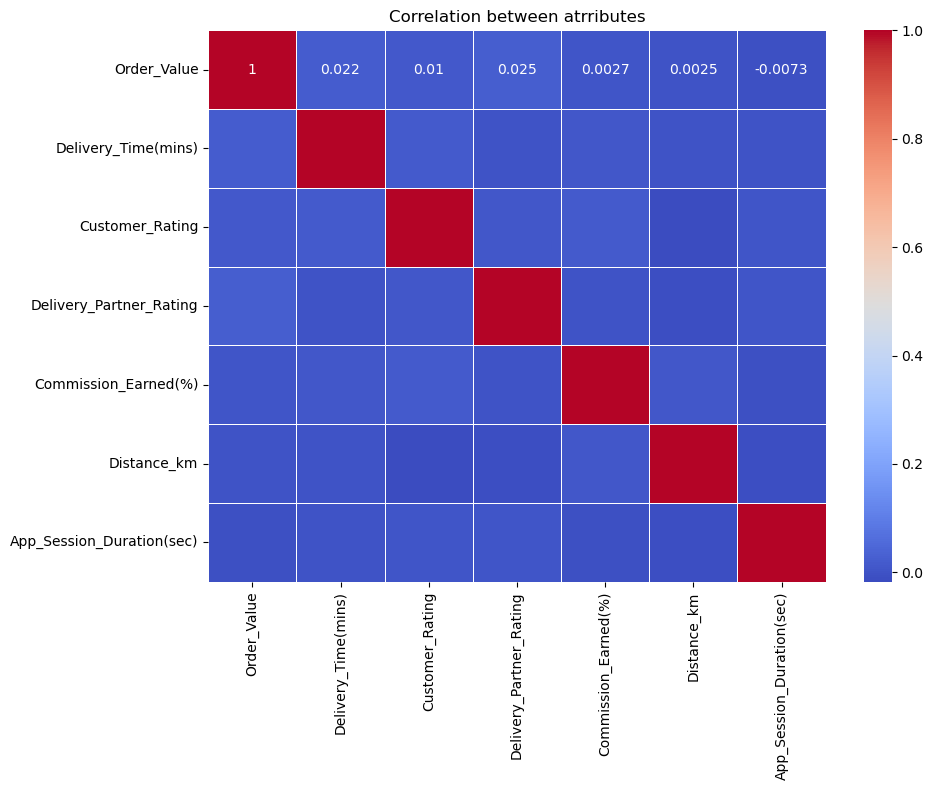

In [147]:
# Coorelation between different attributes
attributes = ['Order_Value','Delivery_Time(mins)','Customer_Rating','Delivery_Partner_Rating',
              'Commission_Earned(%)','Distance_km','App_Session_Duration(sec)']
#-------------------------------------------------- Heatmap Plotting-----------------------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df[attributes].corr(), annot =True, cmap='coolwarm',linewidths = 0.5)
plt.title("Correlation between atrributes")
plt.tight_layout()
plt.show()
#print(df[attributes].corr())

Overview:-
- Correlation between attributes is very weak.
- No stastical use of correlation.

***Order Trend Analysis***

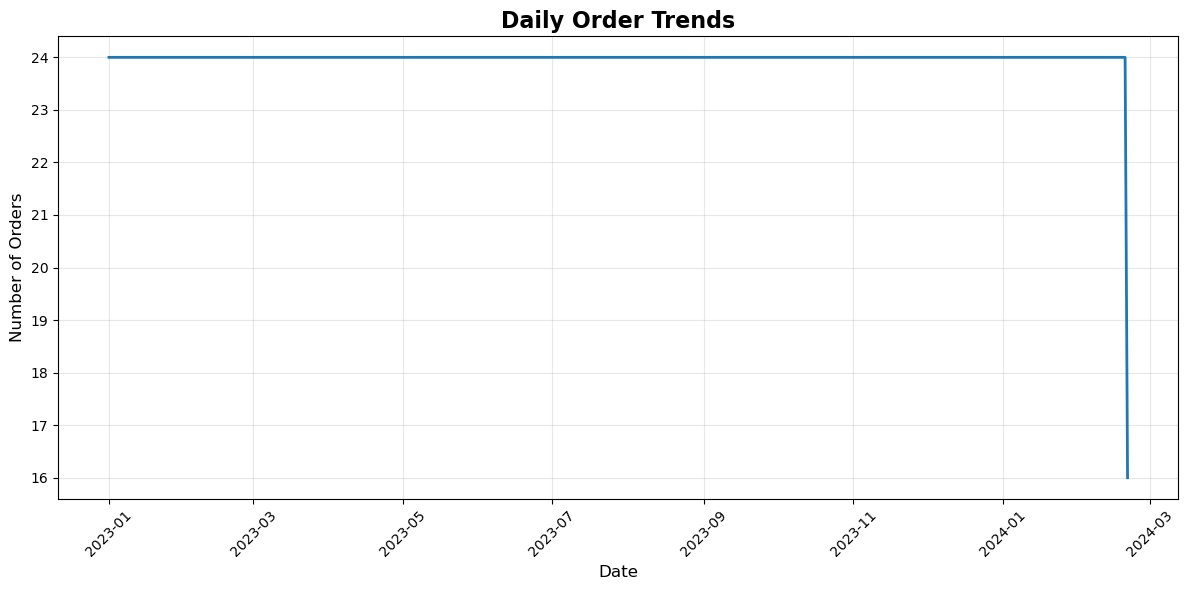

In [151]:
# Time series of daily orders
plt.figure(figsize=(12, 6))
df['Order_DateTime'] = pd.to_datetime(df['Order_DateTime'])
daily_orders = df.groupby(df['Order_DateTime'].dt.date)['Order_ID'].count()
plt.plot(daily_orders.index, daily_orders.values, linewidth=2)
plt.title('Daily Order Trends', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

***Which cities generate highest and lowest orders?***

City
Bangalore    317122.31
Mumbai       321492.78
Jaipur       327761.24
Chennai      328916.99
Surat        332888.87
Pune         334548.02
Lucknow      339579.51
Kolkata      341269.51
Hyderabad    345674.82
Delhi        346433.74
Indore       348756.97
Ahmedabad    358558.20
Name: Order_Value, dtype: float64


Text(0, 0.5, 'Order Count')

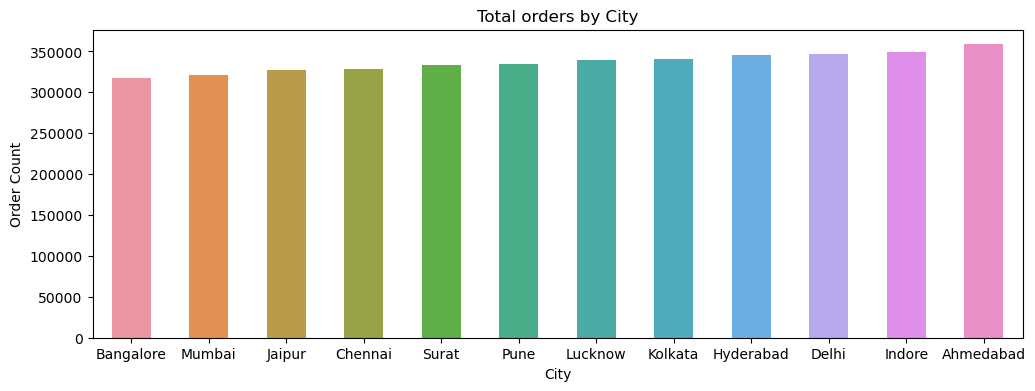

In [160]:
order_count = df.groupby("City")['Order_Value'].sum().sort_values()
print(order_count)
#----------------------------------------------------------Bar Graph Plotting For Citywise Order Value-------------------------------------------------
plt.figure(figsize=(12,4))
sns.barplot(x=order_count.index,y=order_count.values,width = 0.5)
plt.title("Total orders by City")
plt.ylabel("Order Count")

Overview:-
- Ahmedabad has highest order value.
- Bangalore has lowest contribution in the sales.
- The difference between the highest and lowest sale is near about 42k.

***Which cuisines are the most popular in different cities?***

Cuisine    Bakery  Biryani  Chinese  Continental  Fast Food  Italian  Mexican  \
City                                                                            
Ahmedabad      71       71       71           77         91       77       73   
Bangalore      61       78       82           81         66       71       68   
Chennai        80       63       78           77         74       84       86   
Delhi          74       83       65           74         90       87       72   
Hyderabad      88       64       90           78         61       77       74   
Indore         68       84       73           77         72       61       65   
Jaipur         72       65       74           76         84       65       62   
Kolkata        91       82       70           79         88       83       67   
Lucknow        68       64       73           77         76       92       63   
Mumbai         74       81       80           65         77       75       72   
Pune           99       80  

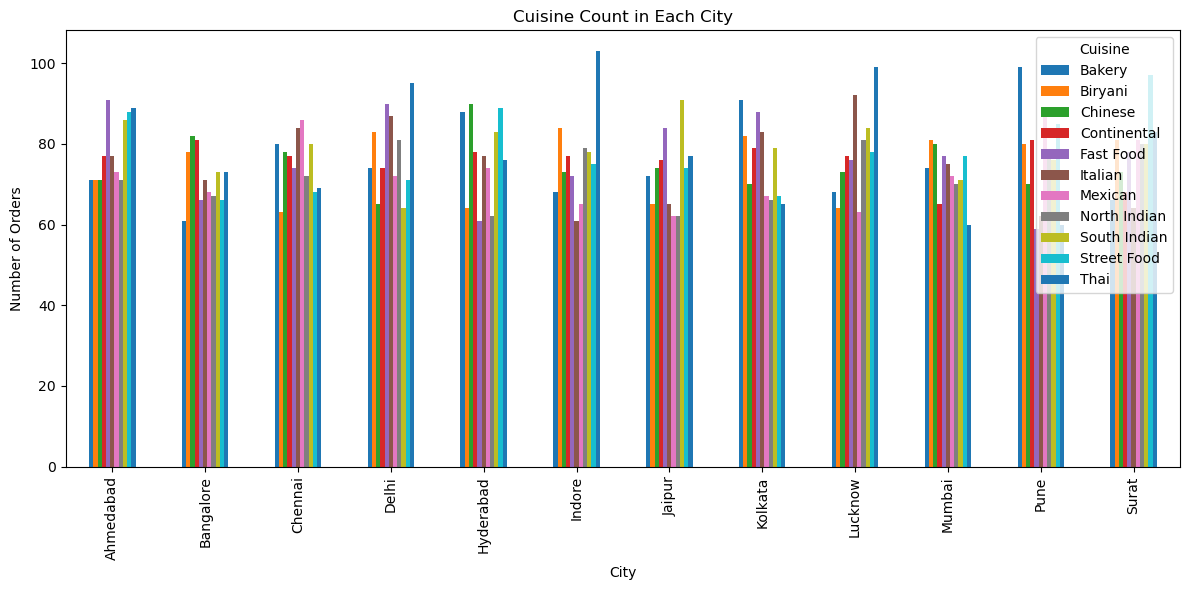

In [164]:
cuisine_count = df.groupby("City")['Cuisine'].value_counts().unstack(fill_value=0)
print(cuisine_count)
cuisine_count.plot(kind='bar', figsize=(12, 6))
#--------------------------------------------------------------Plotting---------------------------------------------------------------------
plt.title('Cuisine Count in Each City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine')
plt.tight_layout()
plt.show()

Overview:-
- List of Popular cuisine and it's city:
      {
       (Ahmedabad  ,          Street Food)
       (Bangalore  ,          Chinese)
       (Chennai    ,          Mexican)
       (Delhi      ,          Bakery)
       (Hyderabad  ,          Chinese)
       (Indore     ,          Bakery)
       (Jaipur     ,          South Indian)
       (Kolkata    ,          Bakery)
       (Lucknow    ,          Bakery)
       (Mumbai     ,          Biryani)
       (Pune       ,          Bakery)
       (Surat      ,          Street Food)}

***Which restaurant generate highest order values and how is it related to commission percentage?***

In [ ]:
restro = df.groupby('Restaurant_ID')['Order_Value'].sum().sort_values(ascending=False)
top_restro_id = restro.idxmax()
data = df.groupby('Restaurant_ID').agg({
    'Order_Value' : 'sum',
    'Commission_Earned(%)' : 'mean'
}).rename(columns = {'Order_Value' : 'Total_Order_Value','Commission_Earned(%)': 'Avg_Commission_Earned(%)'})
#---------------------------------------------------------Plotting-------------------------------------------------------
plt.figure( figsize = (8,5))
plt.scatter(data['Total_Order_Value'],data['Avg_Commission_Earned(%)'], alpha = 0.7, color='teal')
plt.title('Order Value vs. Commission Percentage per Restaurant')
plt.xlabel('Total Order Value')
plt.ylabel('Average Commission Earned (%)')
plt.scatter(data.loc[top_restro_id, 'Total_Order_Value'], data.loc[top_restro_id, 'Avg_Commission_Earned(%)'],
            color='red', s=100, label='Top Restaurant')
plt.legend()
plt.tight_layout()
plt.show()

Overview:-
- The Restaurant which has highest sale value offers less commission.
- As there are many restauants with total sale more than 20000 but offers less commission, a little increase in commission% can help in increasing the platform revenue.
- Most of the restaurants lie in a range of total order value of 15000-25000 and commission% of 15.5-17.5.

***Affect of promo and each campaign on average order value and new users***

Least preffered campaigns in order value:
              Avg_Order_Value_Campaign  Total_New_User_Campaign
Campaign_ID                                                   
CAM11                      397.589922                      244
CAM14                      397.200218                      244
CAM5                       391.349615                      268
CAM20                      389.575281                      240
CAM6                       386.237320                      271

Least preffered campaigns in new users:
              Avg_Order_Value_Campaign  Total_New_User_Campaign
Campaign_ID                                                   
CAM12                      412.147367                      239
CAM8                       401.671564                      238
CAM10                      412.164989                      234
CAM18                      412.370160                      217
CAM2                       411.211492                      215


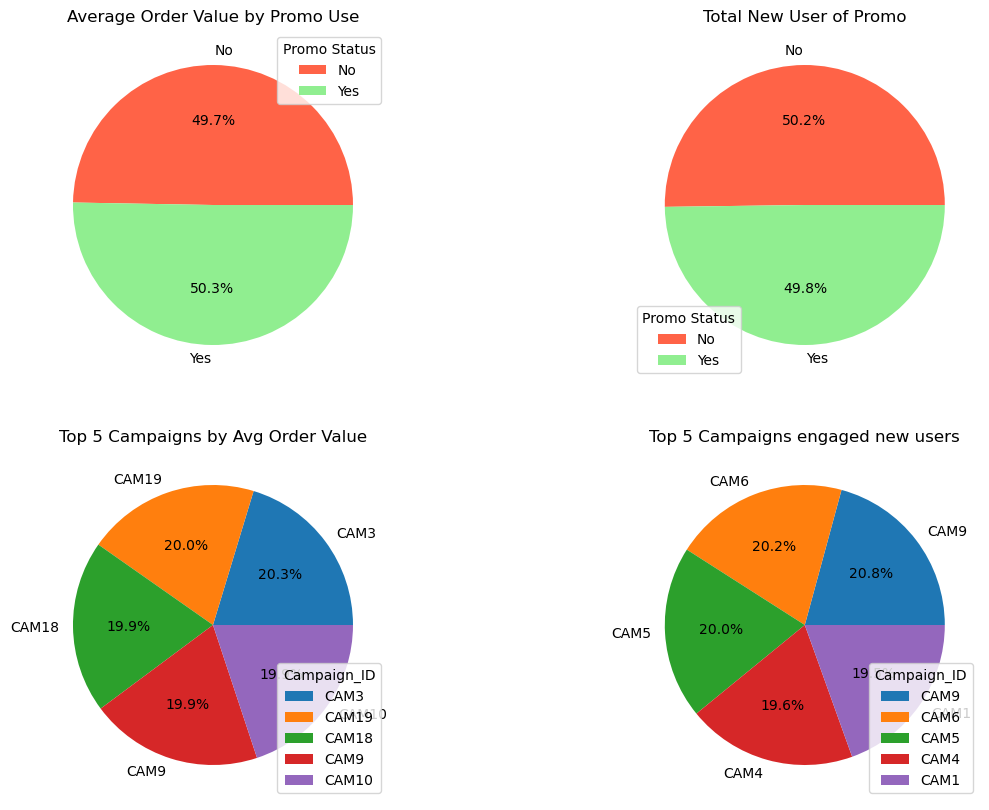

In [133]:
df['New_User'] = df['New_User'].replace({'Yes': 1, 'No': 0})
avg_promo_order = df.groupby('Used_Promo').agg({
    'Order_Value' : 'mean',
    'New_User' : 'sum'
}).rename(columns = {'Order_Value' : 'Avg_Order_Value_Promo','New_User': 'Total_New_User_Promo'})
avg_campaign_order = df.groupby('Campaign_ID').agg({
    'Order_Value': 'mean',
    'New_User' : 'sum'
}).rename(columns = {'Order_Value' : 'Avg_Order_Value_Campaign','New_User': 'Total_New_User_Campaign'})
#--------------------------------------------------Least Preffered Campaigns------------------------------------------------------
Least5_order_value_campaigns = avg_campaign_order.sort_values('Avg_Order_Value_Campaign', ascending=False).tail()
Least5_new_user_campaigns = avg_campaign_order.sort_values('Total_New_User_Campaign', ascending=False).tail()
print("Least preffered campaigns in order value:\n", Least5_order_value_campaigns)
print()
print("Least preffered campaigns in new users:\n", Least5_new_user_campaigns)
# Plotting 
plt.figure(figsize=(14, 10))
#-----------------------------------------------Pie-1: Plot Avg Order Value By Promo---------------------------------------------
plt.subplot(2,2,1)
plt.pie(avg_promo_order['Avg_Order_Value_Promo'],labels=avg_promo_order.index, autopct='%1.1f%%', colors=['tomato', 'lightgreen'])
plt.title('Average Order Value by Promo Use')
plt.legend(title = 'Promo Status')
# ----------------------------------------------Pie-2: Plot Total new user by Promo------------------------------------------------
plt.subplot(2,2,2)
plt.pie(avg_promo_order['Total_New_User_Promo'],labels=avg_promo_order.index, autopct='%1.1f%%', colors=['tomato', 'lightgreen'])
plt.title('Total New User of Promo')
plt.legend(title = 'Promo Status')
#------------------------------------------------Pie-3: Plot Avg Order Value by Campaign---------------------------------------------
plt.subplot(2,2,3)
top5_order_value_campaigns = avg_campaign_order.sort_values('Avg_Order_Value_Campaign', ascending=False).head()
plt.pie(top5_order_value_campaigns['Avg_Order_Value_Campaign'], labels=top5_order_value_campaigns.index, autopct='%1.1f%%')
plt.title('Top 5 Campaigns by Avg Order Value')
plt.legend(title = 'Campaign_ID',loc='lower right')
#----------------------------------------------------Pie-4: Plot Total New User by Campaign----------------------------------------------
plt.subplot(2,2,4)
top5_new_user_campaigns = avg_campaign_order.sort_values('Total_New_User_Campaign', ascending=False).head()
plt.pie(top5_new_user_campaigns['Total_New_User_Campaign'], labels=top5_new_user_campaigns.index, autopct='%1.1f%%')
plt.title('Top 5 Campaigns engaged new users')
plt.legend(title = 'Campaign_ID',loc='lower right')

Overview:-
- As most users prefer promo code so increase in valueable promo codes can help increasing sale.
- Top 5 campaigns that boosted the order values are CAM18, CAM19, CAM3, CAM9,CAM10.
- Top 5 campaigns that boosted new users are CAM1, CAM4, CAM5, CAM9,CAM6.
- 5 Least preffered camaigns in terms of order value were CAM11, CAM14, CAM5, CAM20, CAM6.
- 5 Least preffered camaigns in terms of new user engagement were CAM12, CAM8, CAM10, CAM18, CAM2.
- CAM9 boosted both new users as well as order value.

***List of Delivery Partners with rating less than 3***

In [137]:
Del_Partner_ID = df.loc[((df['Delivery_Partner_Rating'] < 3)&(df['Delivery_Partner_Rating'] != 0)), ['Delivery_Partner_ID','Delivery_Partner_Rating','City']]
print(Del_Partner_ID.drop_duplicates())
#--------------- Cities with less rated delivery partners----------------------------------------
print(Del_Partner_ID.groupby('City')['Delivery_Partner_ID'].count().sort_values(ascending=False))
print(df['Delivery_Partner_ID'].drop_duplicates().count())

     Delivery_Partner_ID  Delivery_Partner_Rating       City
15               DID4954                      2.6    Kolkata
17               DID4551                      2.8      Surat
27               DID1579                      2.5    Lucknow
28               DID1504                      2.6       Pune
30               DID1020                      2.8  Ahmedabad
...                  ...                      ...        ...
9969             DID4476                      2.5  Hyderabad
9973             DID4354                      2.7    Lucknow
9980             DID3258                      2.9     Jaipur
9982             DID4814                      2.7    Chennai
9993             DID4940                      2.6  Ahmedabad

[1749 rows x 3 columns]
City
Delhi        157
Indore       156
Kolkata      155
Chennai      153
Lucknow      149
Ahmedabad    148
Jaipur       143
Surat        142
Mumbai       141
Bangalore    139
Hyderabad    139
Pune         135
Name: Delivery_Partner_ID, dtype: 

Overview:-
- 46% of delivery partners have rating between less than 3.
- Cities with poor delivery services are: Delhi, Indore, Kolkata, Chennai, Lucknow, Ahmedabad, Jaipur, Surat, Mumbai, Bangalore, Hyderabad and Pune.

### Conclusion

This analysis provided meaningful insights into customer behavior, promotional strategies, and delivery partner performance on a food delivery platform. Key findings reveal that:
- Promotional campaigns slightly increase order value and significantly attract new users.
- A few campaigns and restaurants contribute to a large portion of revenue, highlighting potential areas to scale or replicate.
- Delivery partner ratings can help in identifying service gaps and improving overall customer experience.